# Hypothesis Testing 

## SWBATs

1. Describe the right context for conducting a one sample t-test.
2. Demonstrate a clear understanding of the calculations involved in calculating t-value and critical t-value using formulas as well as with SciPy functions.
3. Calculate and Interpret p-value towards accepting or rejecting the null hypothesis.
4. Compare the t-test and resulting p-value with Effect Size and describe both statictics and their application.
5. Perform a complete one-sample t-test analysis and describe the results 

### Critical value approach

The critical value approach involves determining "likely" or "unlikely" by determining whether or not the observed test statistic is more extreme than would be expected if the null hypothesis were true. That is, it entails comparing the observed test statistic to some cutoff value, called the **"critical value"**. If the test statistic is more extreme than the critical value, then the null hypothesis is rejected in favor of the alternative hypothesis. If the test statistic is not as extreme as the critical value, then the null hypothesis is not rejected.

A detailed description of hypothesis testing with t-tests can be found [here](http://www.mas.ncl.ac.uk/~njnsm/medfac/docs/ttest)

## t-test
The t test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.

In this lesson, you shall get an introduction to T-tests, in particular "One Sample T-test". There are different kinds of T-tests including 1-sample t, 2-sample t and paired t. This lesson will show you the calculation behind a 1-sample t-test and how to perform t-test in Python using NumPy and SciPy. 

### One Sample t-test

The one sample t-test is a statistical procedure used to determine whether a sample of observations could have been generated by a process with a specific mean. The one sample t test compares the mean of your sample data to a known value. For example, you might want to know how your sample mean compares to the population mean. You should run a one sample t test when you don’t know the population standard deviation or you have a small sample size. For a full rundown on which test to use, 

Suppose you are interested in determining whether an bakery production line produces cakes with the weight of exactly 2 pounds. To test this hypothesis, you could collect a sample of cakes from the production line, measure their weights, and compare the sample with a value of 2 using a one-sample t-test.

### Assumptions for the test (your data should meet these requirements for the test to be valid):

* **Data is independent**

Independence means the value of one observation does not influence or affect the value of other observations. Independent data items are not connected with one another in any way (unless you account for it in your model). This includes the observations in both the “between” and “within” groups in your sample. Non-independent observations introduce bias and can make your statistical test give too many false positives.  

* **Data is collected randomly** 

A sample is random when each data point in your population has an equal chance of being included in the sample; therefore selection of any individual happens by chance, rather than by choice. This reduces the chance that differences in materials or conditions strongly bias results. Random samples are more likely to be representative of the population; therefore you can be more confident with your statistical inferences with a random sample. 

* **The data is approximately normally distributed**

A normal distribution assumptions is that the sampling distribution of the mean is normal. That is, if you took a sample, calculated its mean, and wrote this down; then took another (independent) sample (from the same population) and got its mean and wrote it down; and did this an infinite number of times; then the distribution of the values that you wrote down would always be a perfect bell curve. While maybe surprising, this assumption turns out to be relatively uncontroversial, at least when each of the samples is large, such as N ≥ 30. 




Lets look at a sample analytical question and work through the process of calculating the significance of results. 

### Sample question: 

>** *"Acme Ltd. wants to improve sales performance. Past sales data indicate that the average sale was 100 dollars per transaction. After training the sales force, recent sales data (taken from a sample of 25 salesmen randomly) is shown below:"* **

      [132.09, 110.64, 135.77, 130.32, 128.25, 
       106.47, 121.4 ,  90.66, 120.77, 121.14, 
       112.9 , 124.54,  98.09, 108.59,  97.07, 
       120.43, 111.9 , 133.89, 107.03, 126.23, 
       118.3 , 122.82, 129.57, 141.38, 138.39]

> **Did the training work? Test your hypothesis at a 5% alpha level.**




### Step 1: Write your null hypothesis statement

As we are trying to monitor a change in the sales performance after the training, the null-hypothesis addresses the fact that there is no change and sales performance before and after the training are exactly the same. 

**H0: *The null hypothesis is that there is no difference in sales, so:* **

> H0: μ = $100.


### Step 2: Write your alternate hypothesis. 
    
This is the one that we are testing. Our alternat hypothesis should address the expected change in the sales performance i.e. the sales sales performance has increased and thge mean of sales post-training is greater than 100. 

**H1: *The alternative hypothesis is that there is a change i.e. the mean sales increased.* **

> H1: μ > $100.

### Step 3: Import necessary librararies and calculate sample statistics:**

In order to show a significant increase in the sales performance, we need to calculate following values:

* **The population mean (μ).** Given as 100 (from past data).
* **The sample mean (x̄).** Calculate from the sample data
* **The sample standard deviation (sigma).** Calculate from sample data
* **Number of observations(n).** 25 as given in the question. This can also be calculated form the sample data.
* **Degrees of Freedom(df).** Calculate from the sample as df = total no. of observations - 1

First we shall import NumPy and SciPy to store our values and perform t-test. 

In [13]:
## Import the packages
import numpy as np

# Import stats package from SciPy 
from scipy import stats 

import math

# For visualizing distributions - optional 
import seaborn as sns


# Set the random seed for reproducability
np.random.seed(6)

Identify the pieces of information you’ll need to calculate the test statistic. The sample data should provide you with required values.

In [14]:
# Read the sales data into NumPy array. Alternatively, you can also read this data into a Pandas dataframe
sample = np.array([132.09, 110.64, 135.77, 130.32, 128.25, 
                   106.47, 121.4 ,  90.66, 120.77, 121.14, 
                   112.9 , 124.54,  98.09, 108.59,  97.07, 
                   120.43, 111.9 , 133.89, 107.03, 126.23, 
                   118.3 , 122.82, 129.57, 141.38, 138.39])

# Population mean (μ)
mu = 100 

# Sample mean (x̄) using NumPy mean()
x_bar= sample.mean()

# Sample Stadrad Deviation (sigma) using Numpy
sigma = np.std(sample)

# Sample size (n)
n = len(sample)

# Degrees of Freedom
df = n-1

# Print the findings
print ('The sample contains', n, 'observations, with a mean of', x_bar, "and a sample standard deviation (sigma) = ", sigma, ", having", df, 'degrees of freedom.')



The sample contains 25 observations, with a mean of 119.5456 and a sample standard deviation (sigma) =  13.069276668584225 , having 24 degrees of freedom.


Let's also try drawing a distribution from xample values to check for normality

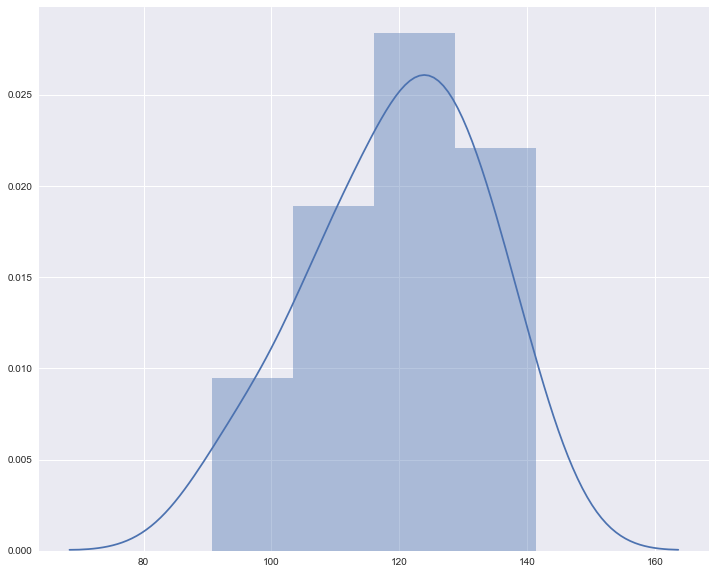

In [15]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(sample)

### Step 4: Calculate the t value from given data

Pur sample distribution looks like a nicely shaped normal distribution. After fulfilling the three requirements for a t-test mentioned above i.e. normality, independance and randomness, we are ready to calculate our t value using the fomula for one-sample t-test given as:
 
 Calculate t-statistic 
 ![formula](t-score.jpg)
 
Where S stands for standard deviation, which we already defined as 'sigma'. We shall implement this formula in python as shown below:

In [16]:
t = (x_bar -  mu)/(sigma/math.sqrt(n))
print (t)

7.477690041937623


> Note that a positive t value indicates that the sample mean is greater than population mean and vice versa. This means that sample's average sales performnace post-training is greater than average population sales performance. 

This sounds like good news, **BUT** is the increase high enough to reject the null hypothesis and accept that there is a significant increase in the mean of post training sales perfromance, or is it just by chance. Lets have a look at the t-distribution table to calculate our critical t_value, also, how to calculate the critical t value in python.

### Step 5: Find the critical t value. 

You need two values to find this:

The alpha level: given as 5% in the question.

The degrees of freedom, which is the number of items in the sample (n) minus 1: 25 – 1 = 24.

![t-dist](t-dist.png)

We use a one-tailed t-test towards the positive (right side of the t-distribution) to identify increase in the sales performance. 

Look up 24 degrees of freedom in the left column and p value of 0.05 (from 5% alpha level - 95% confidence level) in the top row. The intersection is `1.711`. This is our one-sample critical t-value.

What this critical value means is that we would expect most values to fall under 1.711. If our calculated t-value (from Step 4) falls within this range, the null hypothesis is likely true.

This value can also be calculated in Python using Scipy.stats module using ppf() (Percent Point Function) as `scipy.stats.ppf(1-alpha, df)`. This calculation is shown below:

In [33]:
t_crit = np.round(stats.t.ppf(1 - 0.05, df=24),3)
print (t_crit)

1.711


As we can see , the critical value returned from the function (rounded off 2 two decimal places) is same as one we found the in t-distribution table i.e. 1.711. 

Using the the [t-distribution calculator](http://www.statdistributions.com/t/), and providing the set p-value, t-value and identifying the type of t-test, we get following graph:

![t_graph](t_graph.png)


### Step 6:
>Compare t-value with critical t-value

Any t value which is greater than 1.711 will fall into the shaded region in above figure. t-values greater than 1.711 would reflect an "extreme" result and can be used to reject the null hypothesis. 

Our calculated t-value i.e. 7.477 is greater than 1.711 and hence our results can be called "statistically significant" and will allow us to reject Null hypothesis and with 95% confidence state that: 

*We are 95% sure that the mean sales performance post training is higher than population mean prior to training.*

**NOTE:** This calculation can also be performed using `ttest_1samp`  function in `SciPy.stats` package using following arguments:


>**scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate')**

Calculate the T-test for the mean of ONE group of scores.

We use a one-tailed t-test as we are looking for an increase in the sales performance. The right tail of the di test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

Parameters:	
a : array_like
sample observation

popmean : float or array_like
expected value in null hypothesis. If array_like, then it must have the same shape as a excluding the axis dimension

axis : int or None, optional
Axis along which to compute test. If None, compute over the whole array a.

nan_policy : {‘propagate’, ‘raise’, ‘omit’}, optional
Defines how to handle when input contains nan. ‘propagate’ returns nan, ‘raise’ throws an error, ‘omit’ performs the calculations ignoring nan values. Default is ‘propagate’.

Returns:	
statistic : float or array
t-statistic

pvalue : float or array
two-tailed p-value

In [43]:
results = stats.ttest_1samp(a= sample, popmean= mu)         
print ("The t-value for sample is", round(results[0], 2), "and the p-value is", np.round((results[1]), 10))

The t-value for sample is 7.33 and the p-value is 1.443e-07


In [58]:
if (results[0]>t_crit) and (results[1]<0.05):
    print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
           round(results[0], 2), "and p-value =", np.round((results[1]), 10))
else:
    print ("Null hypothesis is True")

Null hypothesis rejected. Results are statistically significant with t-value = 7.33 and p-value = 1.443e-07


## Effect Size Calculation for one-sample t-test

The standard effect size (Cohen's d) for a one-sample t-test is the difference between the sample mean and the null value in units of the sample standard deviation:

>**d = x̄ - μ / sigma**

The interpretation here is essentially the same as for the two-sample version of the standardized mean difference as seen previously: **it is the number of standard deviations that your distribution diverges on average**. As in most cases with effect sizes, you can think of it as taking the N out of your test statistic.

Thus, with a test statistic / p-value you get a sense of the confidence you have in your result, but these conflate the size with N, so from a small p you don't know if you have a big effect with a small N or a small effect with a big N. Here, you would get a point estimate of the magnitude of the shift, but you don't know from d=.5 whether or not you can be confident that the true effect isn't 0.

Lets calculate the Cohen'd for our sample using the formula above:


In [103]:
# Calculate Cohen's d and round off 
d = np.round(((119.54 - 100) / 13.06),2)
print(d)

1.5


Cohen has provided reference values for his standardized effect size measures. He stated that d = 0.2, 0.5 and 0.8 correspond to small, medium and large effects respectively.

Following cohen's interpretation, we can confidently say that the sample mean shifts considerably towards positive side as compared to the population means, resulting in a large effect size. This also help us conclude that training has a a clear effect on the sales performance of the sales team, when compared to pre-sales performance. 


### Exercise 1: 

Create a function in python `one_sample_ttest(sample, popmean, alpha)` that will take in a sample array (as the one given above),  the population mean and the alpha value to calculate and return the t-value, critical t-value and p-value for the sample and identify if the results are significant or not. 

### Solution:

In [107]:
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    sns.set(color_codes=True)
    sns.set(rc={'figure.figsize':(12,10)})
    sns.distplot(sample)
    
    # Populaqtion mean 
    mu = popmean
    
    # Sample mean (x̄) using NumPy mean()
    x_bar= sample.mean()

    # Sample Stadrad Deviation (sigma) using Numpy
    sigma = np.std(sample)
    
    # Degrees of freedom
    df = len(sample) - 1
    
    #Calculate the critical t-value
    t_crit = stats.t.ppf(1 - alpha, df=df)
    
    #Calculate the t-value and p-value
    results = stats.ttest_1samp(a= sample, popmean= mu)         
    
    if (results[0]>t_crit) and (results[1]<0.05):
        print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
                round(results[0], 2), "critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10))
    else:
        print ("Null hypothesis is True with t-value =", 
                round(results[0], 2), ", critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10))
    

### Exercise 2:

Use the function created in exercise 1 to conduct following analytical question.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online- course, on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the on-line training has really helped the students and now they should perform better than the class (population) mean. Use this to set your Null and Alternate hypothesis.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t and p values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

### Solution:

Null hypothesis rejected. Results are statistically significant with t-value = 12.69 critical t-value = 1.729132811521367 and p-value = 1e-10


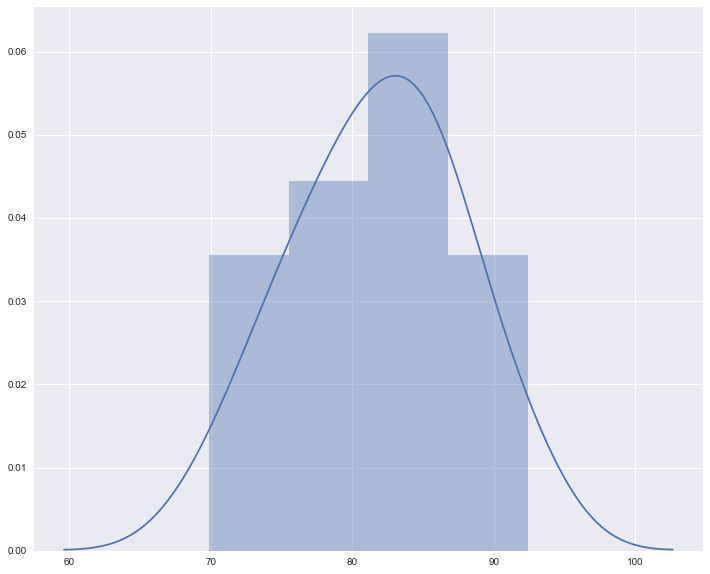

In [108]:
sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
)
sample = sample
popmean = 65
alpha = 0.05
one_sample_ttest(sample, popmean, alpha)

Null hypothesis rejected. Results are statistically significant with t-value = 13.2 critical t-value = 1.729132811521367 and p-value = 1e-10


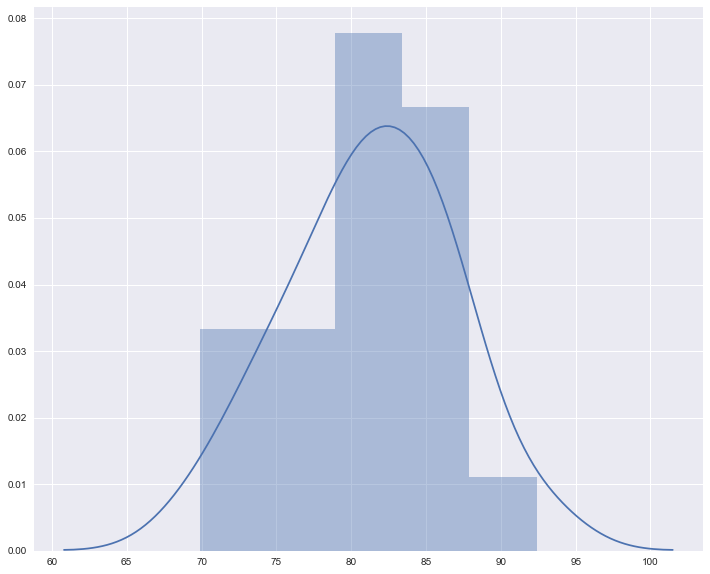

In [109]:
# With corrected values
sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
)
sample = sample
popmean = 65
alpha = 0.05
one_sample_ttest(sample, popmean, alpha)